# Autor

Hugo Aranda Sánchez


# Imports e Instalaciones necesarias

In [2]:
#!pip install plotly --upgrade --user --quiet
#!pip install pandas --upgrade --user --quiet
#!pip install numpy --upgrade --user --quiet
#!pip install scipy --upgrade --user --quiet
#!pip install statsmodels --upgrade --user --quiet
#!pip install scikit-learn --upgrade --user --quiet
#!pip install missingno --upgrade --user --quiet
#!pip install apafib --upgrade  --quiet
#!pip install imblearn --upgrade --user --quiet
#!pip install dtreeviz --upgrade --user --quiet

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from time import time
from datetime import timedelta
init_time = time()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__
from pandas.plotting import scatter_matrix
import missingno as msno


from sklearn import set_config

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import warnings

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

set_config(display='text')
warnings.filterwarnings('ignore')

# La influencia de la cesta de la compra

En esta actividad estudiaremos los cambios en los precios de los alimentos en base a situaciones que se dan en la ciudad de barcelona. Estudiando en particular como la evolución de reservas hosteleras internacinales afecta a los mismos.

# Apartado A

Divide el conjunto de datos en entrenamiento y test (80 %/20 %). Haz una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables,
especialmente con la variable objetivo. Describe las cosas que hayas visto que te parezcan
interesantes. Transforma las variables adecuadamente según el modelo que utilices para
poder ajustar modelos de regresión, tanto el conjunto de entrenamiento como el de test.

## Importar los datos necesarios de la libreria apafib

In [4]:
#cargamos los datos de los clientes del banco
from apafib import load_BCN_cesta
data = load_BCN_cesta()

#hacemos un head para ver un poco como es el formato de la tabla inicialmente
data.head()

,Carn / Pollastre,Carn / Porcí,Fruites i hortalisses / Ceba,Fruites i hortalisses / Patata,Fruites i hortalisses / Plàtan,Fruites i hortalisses / Poma,Fruites i hortalisses / Taronja,Peix i marisc / Llenguado,Peix i marisc / Llobarro,Peix i marisc / Lluç,Peix i marisc / Orada,Indicador de reserves hoteleres internacionals (base = mitjana suavitzada gener/febrer 2020) / Barcelona
0,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,3.63
1,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,3.22
2,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,3.36
3,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,3.86
4,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,4.22


Podemos observar que tenemos 12 variables de las cuales todas son númericas. Podemos apreciar que estas se separan en 3 grandes grupos de productos Carne, Frutas y Hortalizas Y Pescado y Marisco. A continuación esta el valor del indicador de reservas hoteleras el cual será el que estudiemos en reación a las otras variables.

## Separación entre test y train

Los datos de test han de tener una función exclusivamente de validación. Por ende para la visualización haremos uso de la parte de entrenamiento que obtenemos.

In [5]:
#damos un nombre menos incómodo a la columna objetivo
data.rename(columns={'Indicador de reserves hoteleres internacionals (base = mitjana suavitzada gener/febrer 2020) / Barcelona': 'Indicador de Reservas Hoteleras'},
                  inplace = True)

#separamos en variable objetivo y features
X = data.drop('Indicador de Reservas Hoteleras', axis=1)
y = data['Indicador de Reservas Hoteleras']
    
#separamos de forma stratificada para asegurar que preservamos la proporción de objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data_train = pd.concat([pd.DataFrame(X_train), y_train], axis=1)

## Descripción estadística

Ahora estudiaremos como este conjunto de datos es a nivel estadístico.

In [7]:
# Estadísticas descriptivas de nuestros datos
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Carn / Pollastre,292.0,1.070,0.125,0.85,0.960,1.110,1.180,1.24
Carn / Porcí,292.0,1.260,0.184,1.02,1.100,1.240,1.460,1.55
Fruites i hortalisses / Ceba,292.0,0.321,0.108,0.24,0.250,0.300,0.330,1.00
Fruites i hortalisses / Patata,292.0,0.410,0.060,0.34,0.360,0.400,0.450,0.65
Fruites i hortalisses / Plàtan,292.0,1.385,0.306,0.90,1.200,1.275,1.600,2.00
Fruites i hortalisses / Poma,292.0,0.951,0.212,0.70,0.800,0.900,1.000,1.60
Fruites i hortalisses / Taronja,292.0,0.969,0.206,0.60,0.800,0.950,1.200,1.75
Peix i marisc / Llenguado,292.0,13.870,2.073,8.50,12.800,14.000,15.000,19.00
Peix i marisc / Llobarro,292.0,5.049,0.350,4.50,4.800,5.000,5.200,5.95
Peix i marisc / Lluç,292.0,4.336,1.063,1.80,3.500,4.200,5.000,7.50



## Visualización simple

### Variables numericas


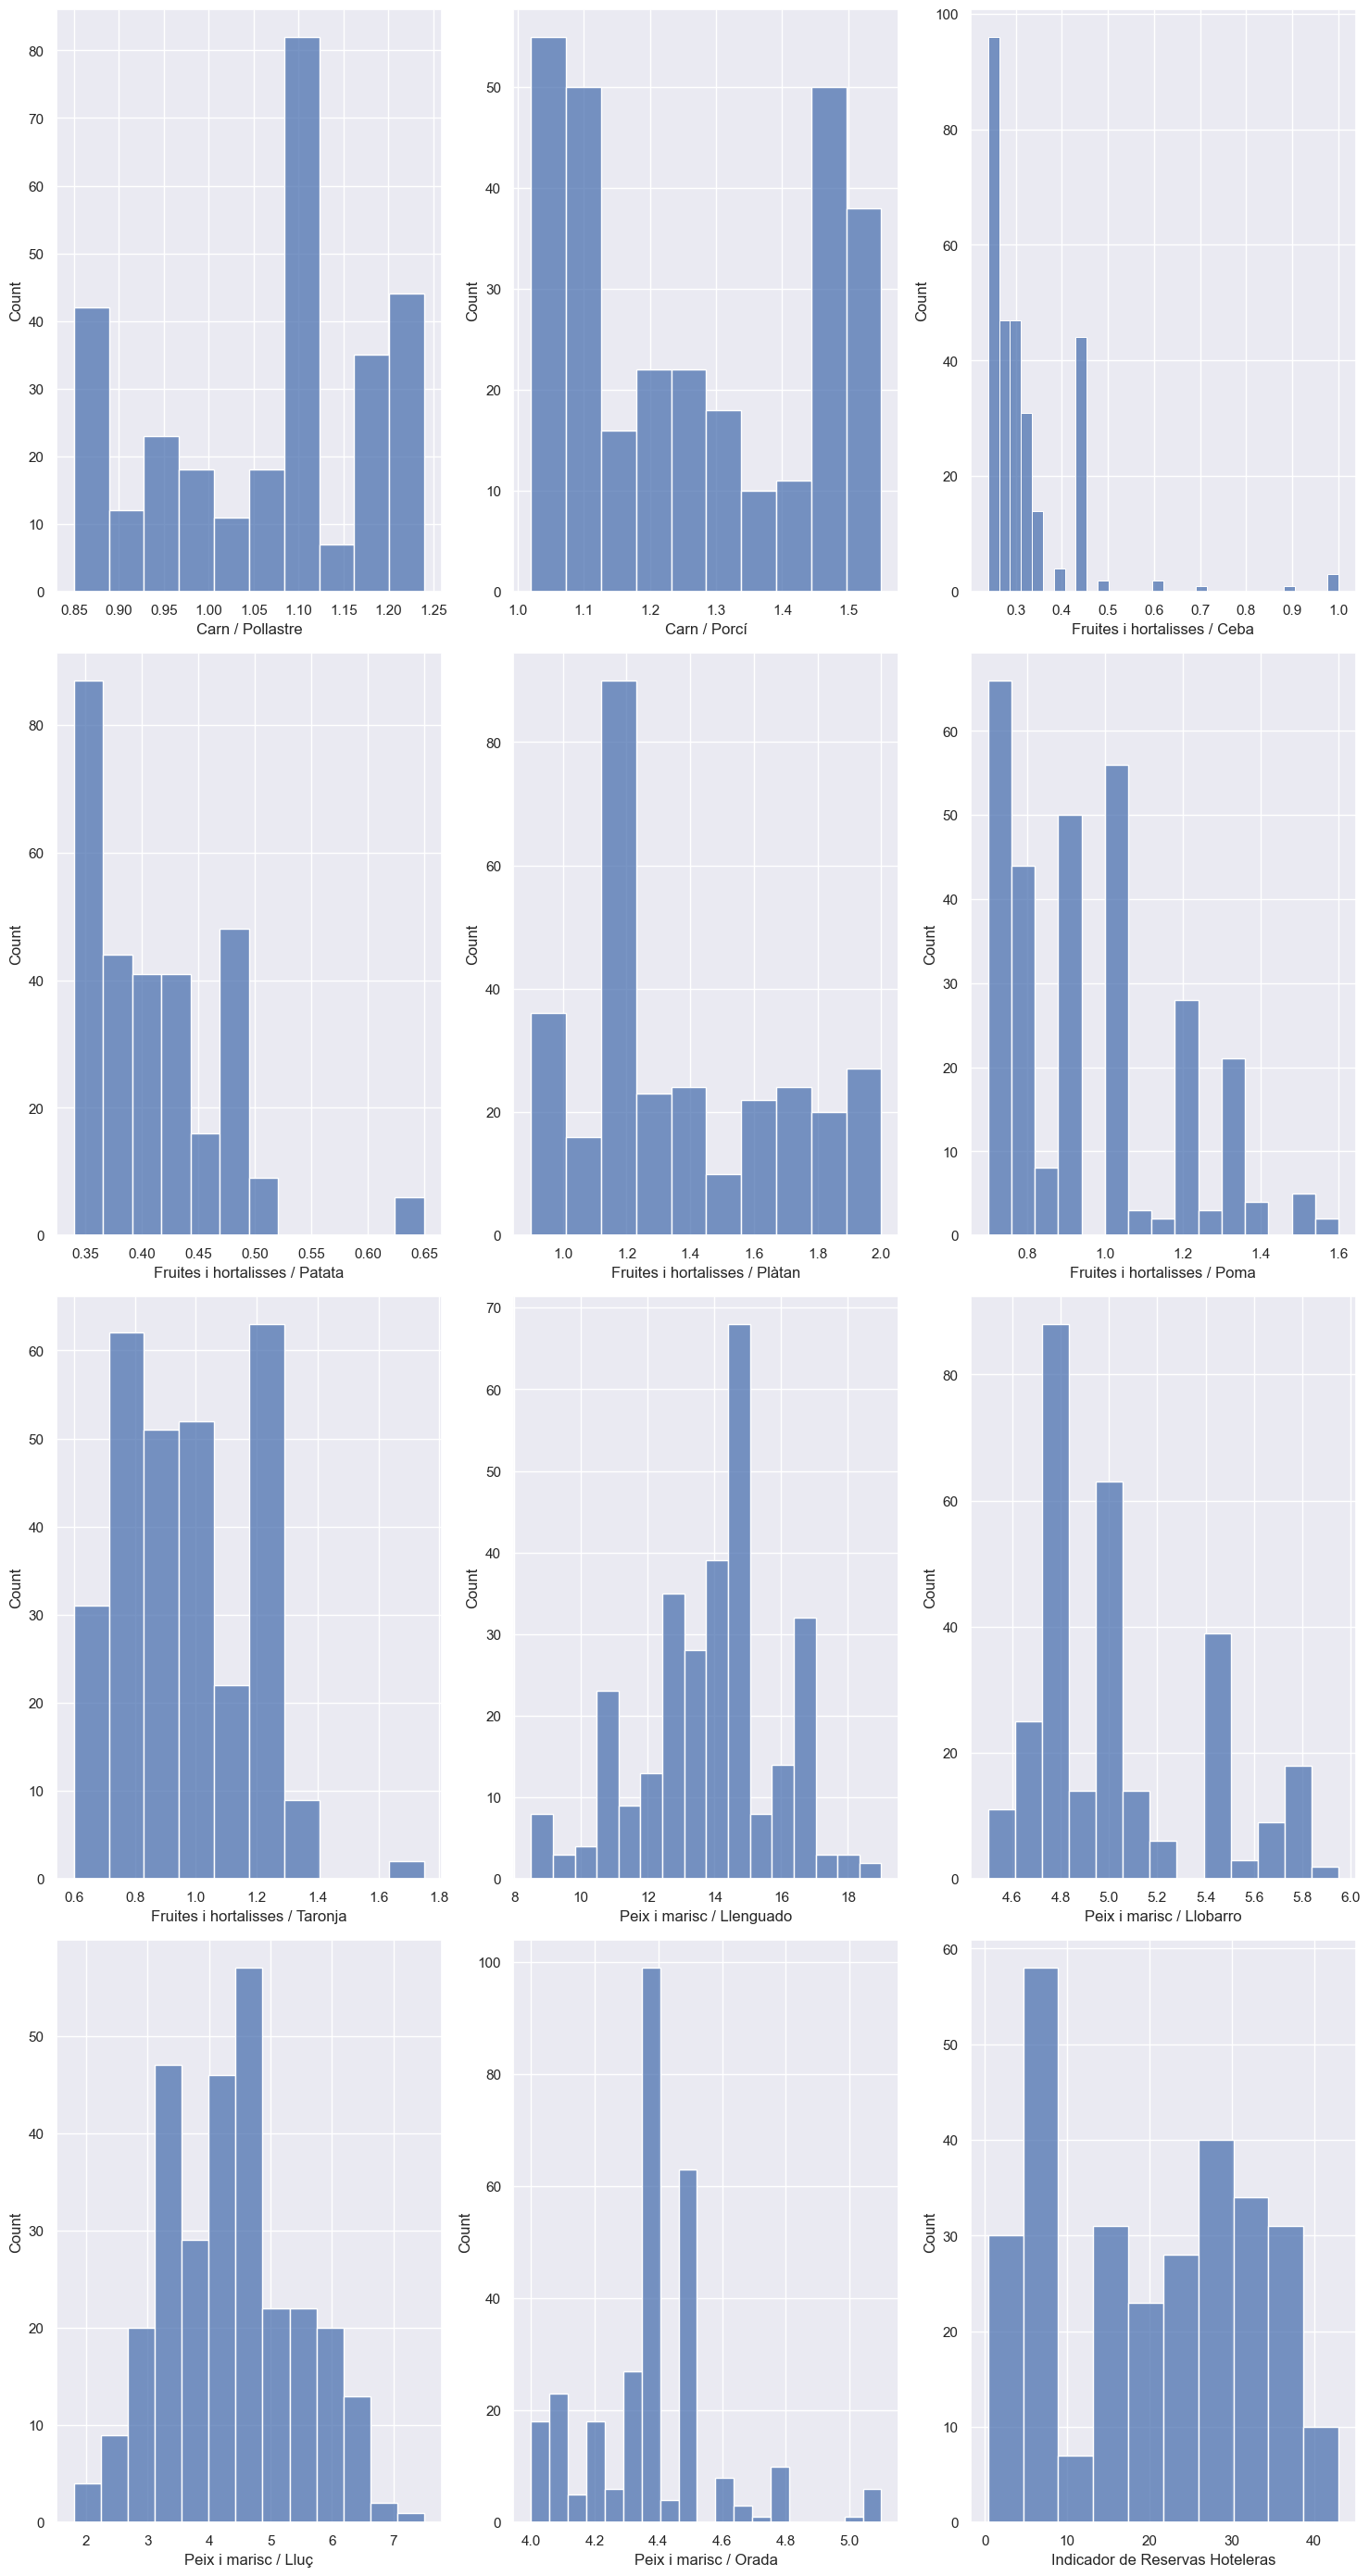

In [11]:
fig, axes = plt.subplots(4,3,figsize=(15,28))

data_train_frame = pd.DataFrame(data_train)
data_train_frame.columns=data.columns
for i, c in enumerate(data.columns):
    ax = axes.reshape(-1)[i]
    b = sns.histplot(x=c,data=data_train,ax=ax, palette='tab10')
plt.tight_layout()

Aquí podemos ver donde oscilan estos valores.

Estos no demuestran mucha normalidad a excepción de la Merluza (Lluç) y el Lenguado. Todos los demás demuestran cierta oscilación de forma más descontrolada.

## Estudio de Correlación


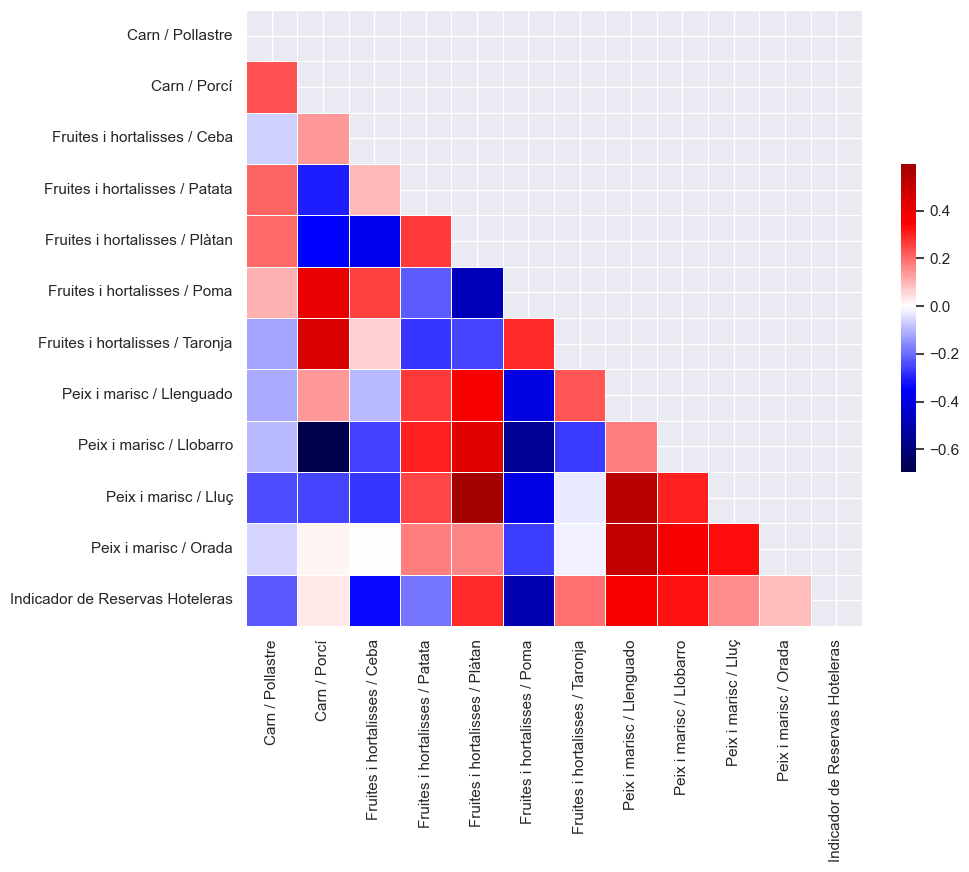

In [9]:
corr = data_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Aquí podemos ver las diferentes correlaciones entre las variables númericas.

Cabe destacar que todo y que la correlación no significa causalidad. Pero como trtaermos de entrenar un modelo a partir de estos datos supondremos posibles relaciones entre las diferentes features. 

En general todas las variables tienen cierta correlación (algunos incluso negativa en contra de lo que uno se podría imaginar) con el Indicador a excepción de algunos productos en particular (Cerdo y Dorada). La correlación positiva reforzaria un aspecto de el posible impacto que tiene el turismo en un aumento de precios por el alto poder adquisitivo del turismo extranjero. Además es especialmente fuerte en pescados relativamente caros de por si. En la fruta se observan comportamientos extraños que podrían estar ligados con la temporada de recolección de la misma. La carne también tiene correlaciones negativas con la variable objetivo.

In [14]:
from scipy.stats import normaltest
print(normaltest(data_train['Peix i marisc / Llobarro'], nan_policy='omit'))
print(normaltest(data_train['Peix i marisc / Orada'], nan_policy='omit'))
print(normaltest(data_train['Fruites i hortalisses / Taronja'], nan_policy='omit'))

NormaltestResult(statistic=35.17378111310182, pvalue=2.3020273412506307e-08)
NormaltestResult(statistic=35.741851773468994, pvalue=1.7328281754761077e-08)
NormaltestResult(statistic=12.705550878016677, pvalue=0.0017419058675521648)


Miramos rápidamente si hay algun outlier destacable

<Axes: >

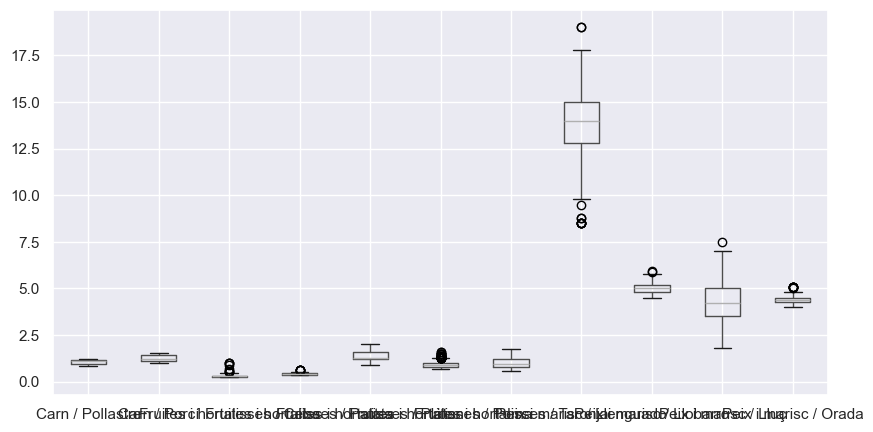

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
data_big = X.columns
data_train[data_big].boxplot()

## Preprocessing 

Para el preprocessing solamente estandarizaremos los valores para que los modelos puedan trabajarlos correctamente.


## Estandarización

In [19]:
X_train_sd = X_train.copy()
X_test_sd = X_test.copy()
sc = StandardScaler()
X_train_sd[X_train.columns] =  sc.fit_transform(X_train)
X_test_sd[X_test.columns] =  sc.transform(X_test)
X_train_sd.describe().T

,count,mean,std,min,25%,50%,75%,max
Carn / Pollastre,292.0,6.540e-17,1.002,-1.765,-0.883,0.319,0.881,1.362
Carn / Porcí,292.0,-8.608e-16,1.002,-1.307,-0.871,-0.110,1.087,1.576
Fruites i hortalisses / Ceba,292.0,-1.217e-17,1.002,-0.752,-0.659,-0.196,0.082,6.289
Fruites i hortalisses / Patata,292.0,-2.274e-16,1.002,-1.178,-0.843,-0.172,0.666,4.018
Fruites i hortalisses / Plàtan,292.0,2.981e-16,1.002,-1.587,-0.605,-0.359,0.706,2.016
Fruites i hortalisses / Poma,292.0,-1.338e-16,1.002,-1.186,-0.712,-0.239,0.234,3.074
Fruites i hortalisses / Taronja,292.0,-1.019e-16,1.002,-1.791,-0.819,-0.091,1.124,3.795
Peix i marisc / Llenguado,292.0,-4.684e-16,1.002,-2.595,-0.517,0.063,0.546,2.479
Peix i marisc / Llobarro,292.0,-7.513e-16,1.002,-1.572,-0.713,-0.139,0.434,2.583
Peix i marisc / Lluç,292.0,-4.137e-16,1.002,-2.391,-0.788,-0.128,0.626,2.983


# Apartado B

Ajusta una SVM de regresión con kernel polinómico y con kernel RBF explorando los
hiperparámetros adecuadamente. Elige adecuadamente el modelo que parezca mejor y usa
el método de permutation importance sobre el test para determinar qué atributos son más
importantes en el modelo para predecir.

## Elección y ejecución de muestreo

Escogemos 5 folds pues ya son suficientes para poder probar diferentes configuraciones además de 15 iteraciones.

Utilizaremos también una función extraída de los documentos de teoría ofrecidos para guardar resultados y una función para printar la importancia de nuestras features y ahorrar espacio de código.

In [286]:

from sklearn.inspection import permutation_importance

def save_results(test_score, cross_val_score, nclf, df):
    df.loc[nclf,'test_score'] = test_score
    df.loc[nclf,'cross_val_score'] = cross_val_score
    return df

def print_importance(model, X_test, y_test, name):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    # Tomar los valores de importancia
    feature_names = X_test.columns
    sorted_idx = perm_importance.importances_mean.argsort()
    sorted_features = [feature_names[i] for i in sorted_idx]
    importance_values = perm_importance.importances_mean[sorted_idx]
    
    # Escribir los coeficientes
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, importance_values, color='purple')
    plt.xlabel('Coefficient Magnitude')
    plt.title('Coefficients of ' + name)
    plt.show()

def print_plots(model, X_test, y_test):
    # Calcular predicciones en el conjunto de prueba
    predicciones = model.predict(X_test)
    
    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, predicciones)
    mae = mean_absolute_error(y_test, predicciones)
    r2 = r2_score(y_test, predicciones)
    
    # Imprimir métricas de evaluación
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Error absoluto medio (MAE): {mae}")
    print(f"Coeficiente de determinación (R^2): {r2}")

    # Visualizar valores reales vs. predichos con línea de mejor ajuste
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predicciones, alpha=0.5)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Valores Reales vs. Predichos con Línea de Mejor Ajuste')
    
    # Añadir línea de mejor ajuste (regresión lineal) utilizando polyfit
    coeficientes = np.polyfit(y_test, predicciones, 1)
    poly_line = np.poly1d(coeficientes)
    plt.plot(y_test, poly_line(y_test), color='purple')

    plt.show()
    # Gráfico de residuos
    residuos = y_test - predicciones
    plt.figure(figsize=(8, 6))
    plt.scatter(predicciones, residuos, alpha=0.5)
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()


results_df = pd.DataFrame()

niter = 15
cv = 5

## SVM Polinomial

Primero de todo crearemos una Support Vector Machine polinomica para evaluar comose comporta con la misma. Utilizaremos BayesSearchCV por ser este más eficiente en las búsquedas al tener un enfoque probabilítsico.

In [225]:
from sklearn.svm import SVR

from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

np.int = int # fix for skopt
np.float = float # fix for skopt

Los hiperparametros a explorar son el parámetro de regularización en SVM (C) que controla el equilibrio entre maximizar el margen y minimizar la clasificación incorrecta y degree que pone el grado del polinomio del kernel.

In [281]:
params = {'C': 10**np.linspace(-3,3,50),'degree':[2,3]}

psvr = SVR(kernel='poly', max_iter=50000,  cache_size=2000)
psvr_bs = BayesSearchCV(psvr,params,n_iter=niter, cv=cv, n_jobs=-1)
psvr_bs.fit(X_train_sd, y_train);

In [282]:
show_html(pd.DataFrame(psvr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 429.1934260128778, 'degree': 3}",0.789,1
13,"{'C': 429.1934260128778, 'degree': 3}",0.789,1
11,"{'C': 1000.0, 'degree': 3}",0.787,3
1,"{'C': 79.06043210907701, 'degree': 3}",0.766,4
12,"{'C': 44.98432668969444, 'degree': 3}",0.726,5


Error cuadrático medio (MSE): 16.872348682350875
Error absoluto medio (MAE): 2.681584244083925
Coeficiente de determinación (R^2): 0.8721541708619411


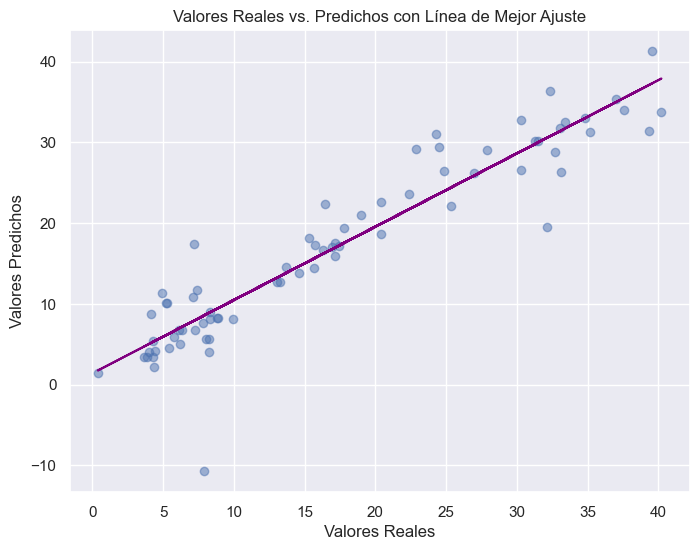

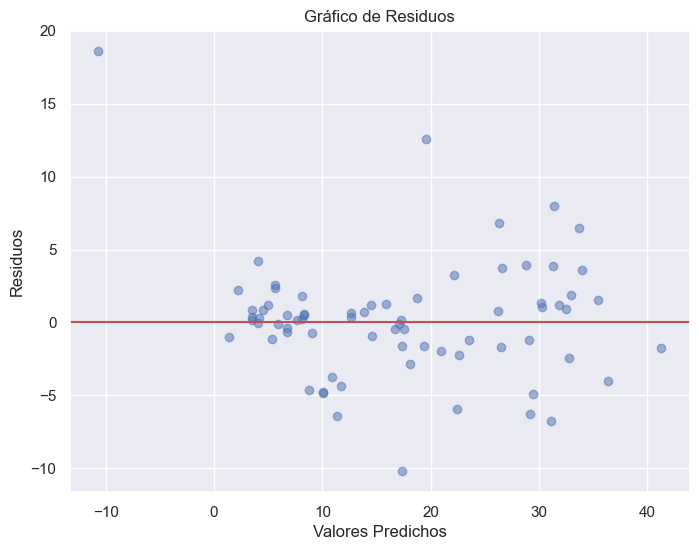

In [283]:
print_plots(psvr_bs, X_test_sd, y_test)

Vemos que el mse es de 16.87 cosa que nos indica que en promedio las predicciones difieren esa misma cantidad de unidades al cuadrado de los valores reales, esto en términos absolutos es de 2.68. Un error considerable pero relativamente pequeño para la poca causalidad que podriamos esperar. El coeficiente de determinación superior a un 85% sugiere que el modelo explica correctamente ese mismo porcentaje de variabilidad proponiendo un buen ajuste a los datos.

Esto se ve reforzado en la visualización donde vemos que los valores reales vs predichos no distan mucho de la recta identidad (la trazada es la linea de mejor ajuste). Los residuos nos hacen apreciar el error cometido.

In [291]:
results_df = save_results(psvr_bs.score(X_test_sd, y_test),psvr_bs.best_score_,'Poly SVR',results_df)

## RBF Kernel

Ahora utilizaremos un kernel mas complejo que utiliza una función de base radial para medir la simmilitud o distancia entre dos puntos. De esta manera seremos capaces de capturar patrones más complejos no lineales.

Los parametros son C (ya explicado), gamma (que define el coeficiente del kernel RBF) y epsilon (que es el margen de error permitido por la función de pérdida en SVM)

In [231]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbfsvr = SVR(kernel='rbf', max_iter=50000,  cache_size=2000)
rbfsvr_bs = BayesSearchCV(rbfsvr,param,n_iter=niter, cv=cv, n_jobs=-1)
rbfsvr_bs.fit(X_train_sd, y_train);

Solamente con el mean test score ya vemos que vamos algo mejor.

In [232]:
show_html(pd.DataFrame(rbfsvr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
3,"{'C': 36.3078054770101, 'epsilon': 0.0, 'gamma': 'scale'}",0.890,1
2,"{'C': 501.18723362727246, 'epsilon': 0.001, 'gamma': 'auto'}",0.890,2
14,"{'C': 660.6934480075951, 'epsilon': 0.009000000000000001, 'gamma': 'scale'}",0.886,3
1,"{'C': 18.197008586099827, 'epsilon': 0.001, 'gamma': 'auto'}",0.876,4
5,"{'C': 2.6302679918953813, 'epsilon': 0.001, 'gamma': 'scale'}",0.726,5


Error cuadrático medio (MSE): 8.57219139236932
Error absoluto medio (MAE): 1.841621558447718
Coeficiente de determinación (R^2): 0.9350464516398976


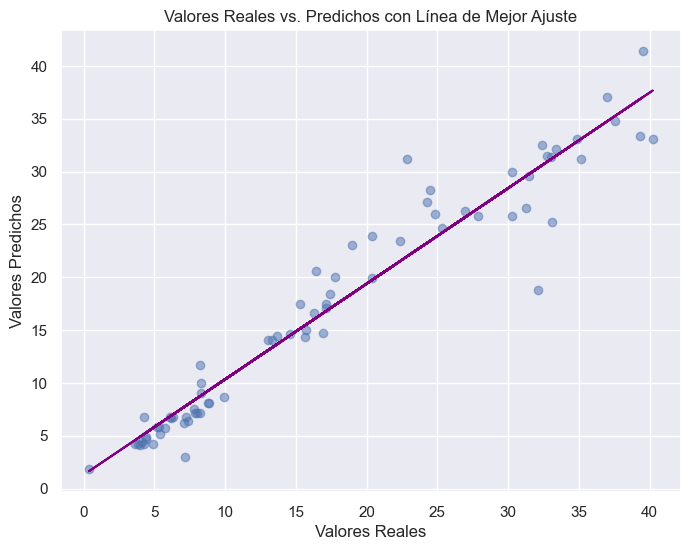

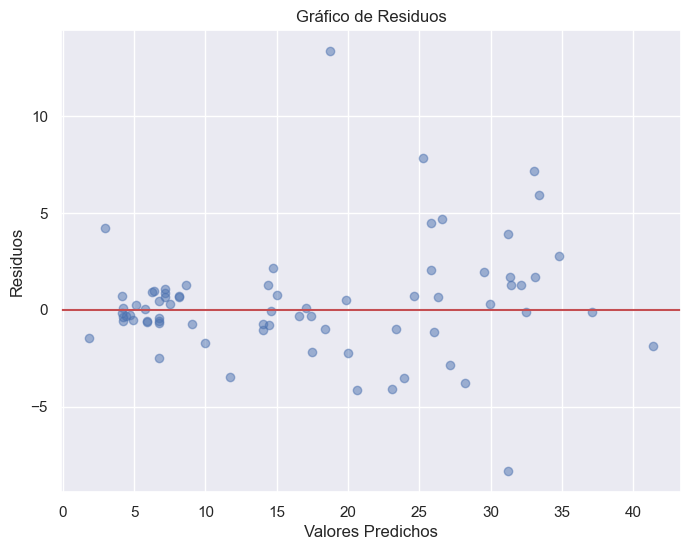

In [233]:
print_plots(rbfsvr_bs, X_test_sd, y_test)

La no linealidad nos permite como podemos ver mejorar bastante los coeficientes y el R2 (ahora por encima de 90%). Podemos apreciar en los graficos que los puntos se ciñen mucho más a la lina ideal propuesta y que los residuos son mas pequeños.

In [288]:
results_df = save_results(rbfsvr_bs.score(X_test_sd, y_test),rbfsvr_bs.best_score_,'BRF SVM',results_df)

In [289]:
results_df

,test_score,cross_val_score
Poly SVR,0.872,0.789
BRF SVM,0.935,0.890


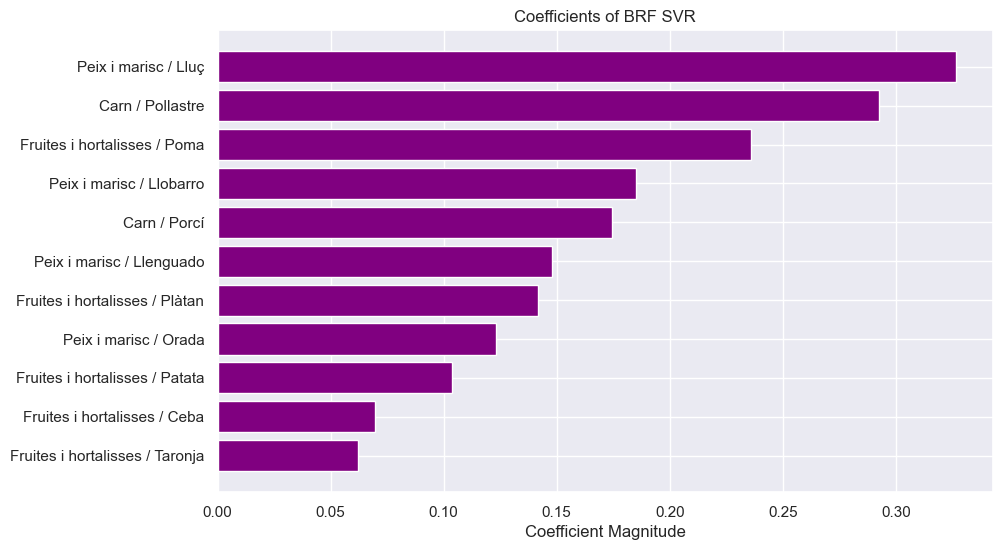

In [236]:
print_importance(rbfsvr_bs, X_test_sd, y_test, 'BRF SVR')

Observanod las importancias de las variables en el modelo del que mejor funciona podemos ver que todas tienen algo de importancia siendo la lubina la que más aporta a la predicción. Seguida de la otra carne más popular (el pollo) y la fruta que mas aporta al problema es la manzana. Observaremos que esto no cambie a lo largo del resto de modelos.

# Apartado C

Ajusta los modelos random forest y gradient boosting para regresión explorando los hiperparámetros adecuadamente. Elige adecuadamente el modelo que parezca mejor y usa
el método de permutation importance sobre el test para determinar qué atributos son más
importantes en el modelo para predeci
r.
## Random Fore

Sus parametros en este caso se relacionan más con los arboles que conforman el modelo: n_estimators (el número de abroles en el bosque), max_features (número máximo de características a tener en cuenta por división), criterion (el criterio para medir calidad en las divisiones), max_depth (la profundidad máxima del arbol) y min_samples_leaf (El mínimo de muestras para ser una hoja).

Exploramos a través de estos con BayesSearchCV.st

In [244]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'max_features':['sqrt', 'log2'], 
         'criterion':['absolute_error', 'squared_error', 'friedman_mse'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestRegressor(random_state=0)
rf_bs =  BayesSearchCV(rf,param,n_iter=niter, cv=cv, n_jobs=-1)
rf_bs.fit(X_train_sd, y_train);

In [245]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
0,"{'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 25}",0.921,1
12,"{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}",0.921,2
3,"{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 40}",0.894,3
13,"{'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 40}",0.880,4
14,"{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 75}",0.878,5


Error cuadrático medio (MSE): 5.470968778629748
Error absoluto medio (MAE): 1.598631012874786
Coeficiente de determinación (R^2): 0.9585451585395461


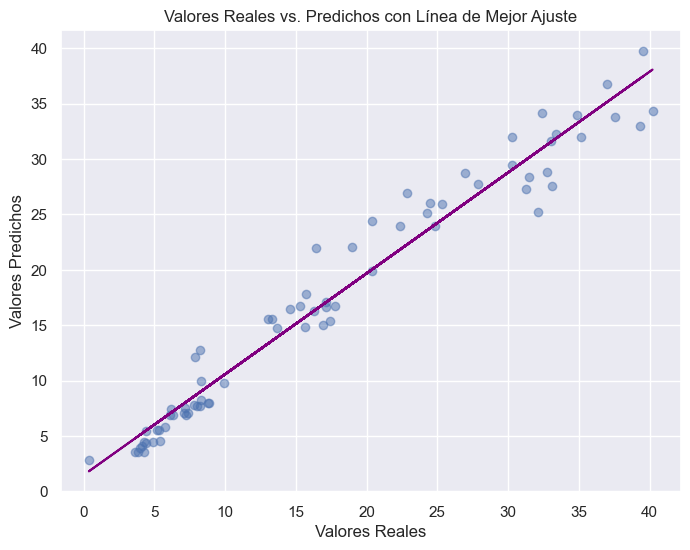

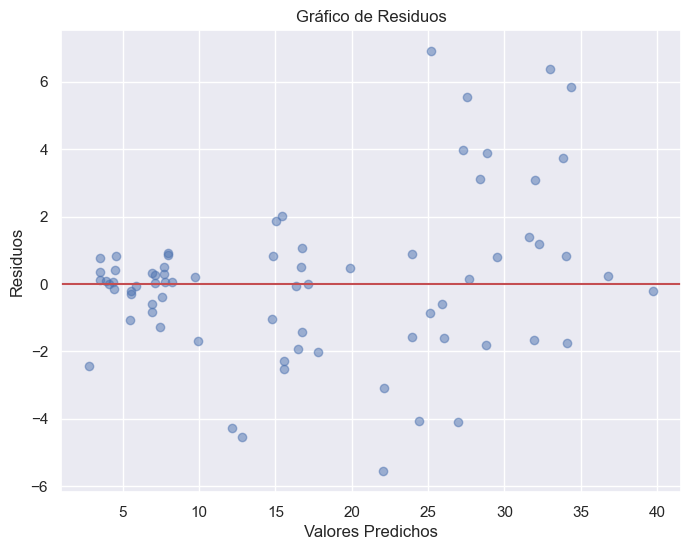

In [246]:
print_plots(rf_bs, X_test_sd, y_test)

Obtenemos mucho mejores resultados en general obteniendo errores pas pequeños y ajustandonos aun más gracias a la exploración con el bosque.

In [247]:

results_df = save_results(rf_bs.score(X_test_sd, y_test),rf_bs.best_score_,'Random Forest',results_df)
results_df

,test_score,cross_val_score
Poly SVR,0.902,0.799
BRF SVM,0.935,0.890
Random Forest,0.959,0.921


## Gradient Boosting

Este método también usa arboles de decisión pero este los va añadiendo secuencialmente y cada uno va corrigiendo al anterior mejorando de forma progresiva.

Sus parametros en este caso se relacionan más con los arboles que conforman el modelo: n_estimators (el número de abroles agregados), loss (función de pérdida optimizada durante el entrenamiento), max_depth (la profundidad máxima del arbol) y learning_rate (tasa de aprendizaje que controla que aporta cada arbol al ajuste)

Exploramos a través de estos con BayesSearchCV.

In [248]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'loss':['absolute_error', 'quantile', 'huber', 'squared_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         #'min_samples_leaf':[1,2,3,5,10], 
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gbr =  GradientBoostingRegressor(random_state=42)
gbr_bs =  BayesSearchCV(gbr,param,n_iter=niter, cv=cv, n_jobs=-1)
gbr_bs.fit(X_train_sd, y_train);

In [249]:
show_html(pd.DataFrame(gbr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
6,"{'learning_rate': 1.0, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 75}",8.962e-01,1
2,"{'learning_rate': 1.0, 'loss': 'huber', 'max_depth': 9, 'n_estimators': 100}",8.736e-01,2
8,"{'learning_rate': 1.0, 'loss': 'huber', 'max_depth': 10, 'n_estimators': 75}",8.550e-01,3
10,"{'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 100}",8.068e-01,4
5,"{'learning_rate': 10.0, 'loss': 'quantile', 'max_depth': 9, 'n_estimators': 5}",-1.718e+09,5


Error cuadrático medio (MSE): 15.80533860338329
Error absoluto medio (MAE): 2.0712900590992507
Coeficiente de determinación (R^2): 0.8802391619211273


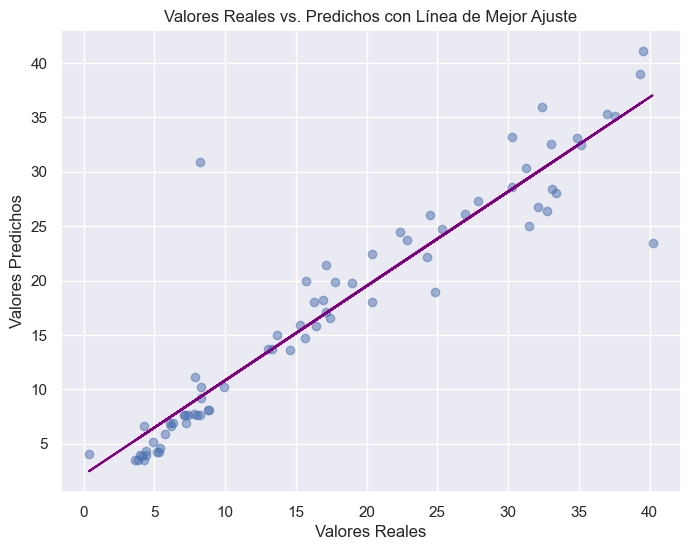

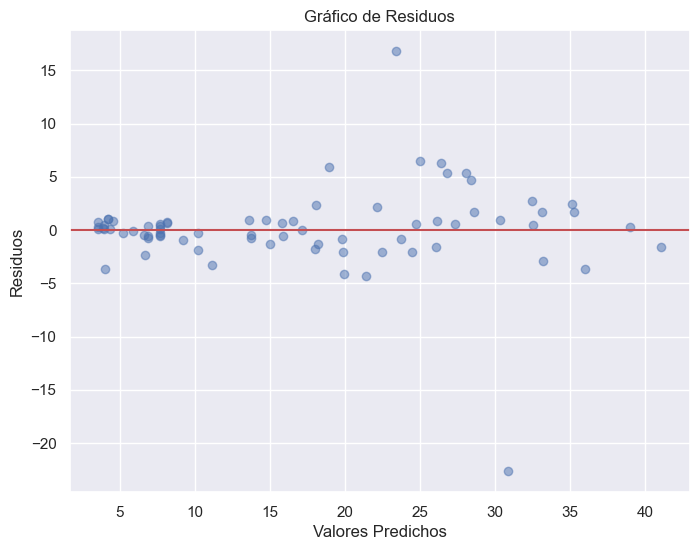

In [250]:
print_plots(gbr_bs, X_test_sd, y_test)

Curiosamente en este nos encontramos un bajón de eficiencia el cual se puede deber al componente aleatorio que potenicalmente tiene el modelo (por el random state).

In [251]:
results_df = save_results(gbr_bs.score(X_test_sd, y_test),gbr_bs.best_score_,'Gradient Boosting',results_df)
results_df

,test_score,cross_val_score
Poly SVR,0.902,0.799
BRF SVM,0.935,0.890
Random Forest,0.959,0.921
Gradient Boosting,0.880,0.896


In [252]:
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Random Forest,0.959,0.921
BRF SVM,0.935,0.890
Poly SVR,0.902,0.799
Gradient Boosting,0.880,0.896


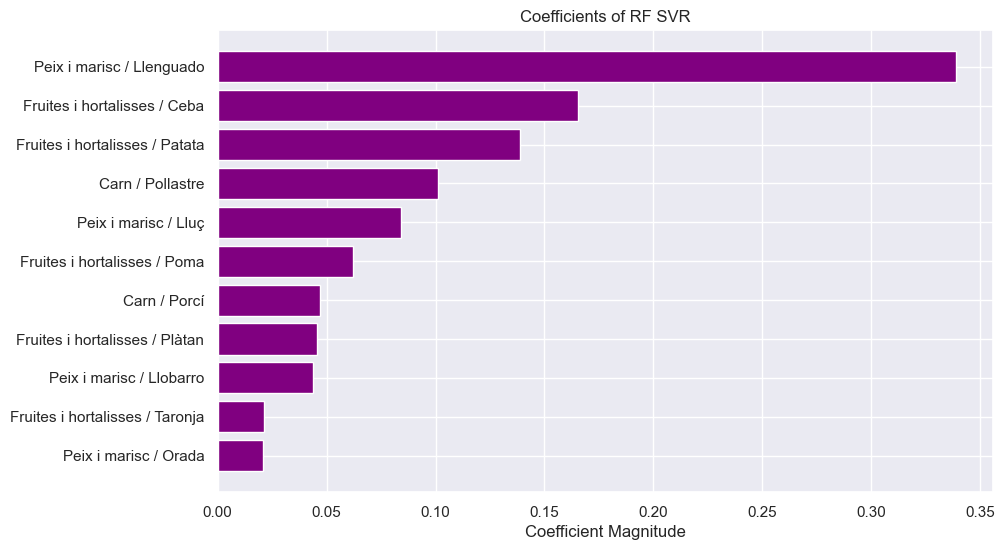

In [253]:
print_importance(rf_bs, X_test_sd, y_test, 'RF SVR')

Estudianmos el modelo de Random Forest y vemos que toma decisiones curiosas. La piedra angular de la predicción en importancia ahora es el lenguado y esta vez un par de hortalizas como son la cebolla y la patata superan al pollo por un poco. Este sigue de cerca y los demás tienen valores más residuales.

# Apartado D

Como hemos visto en teoría cuando tenemos modelos diferentes podemos combinarlos
usando diferentes estrategias. Entrena un StackedRegressor y un VotingRegressor
usando los dos mejores modelos que has encontrado en los apartados anteriores con sus
mejores hiperparámetros. ¿Es mejor alguno de estos modelos combinados? Calcula la permutation importance de los atributos sobre el test con estos modelos combinados ¿ha cambiado qué usan los modelos para obtener las predicciones?

In [254]:
from sklearn.ensemble import StackingRegressor, VotingRegressor

In [271]:
#Ponemos los que mejores estimadores de los mejores modelos nos han dado en ambos casos
sr = StackingRegressor([('rf', rf_bs.best_estimator_),('rbfsvr', rbfsvr_bs.best_estimator_)],cv = cv, n_jobs=-1)
                             
sr.fit(X_train_sd, y_train);  

Error cuadrático medio (MSE): 5.455161403927425
Error absoluto medio (MAE): 1.7999833354538473
Coeficiente de determinación (R^2): 0.9586649348056346


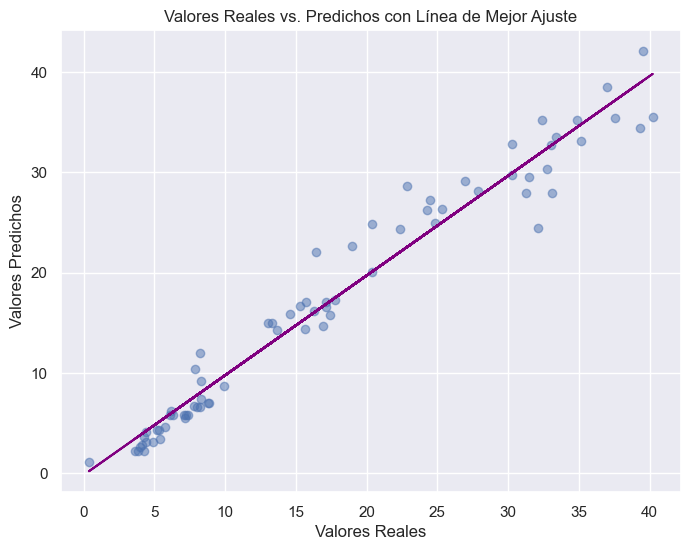

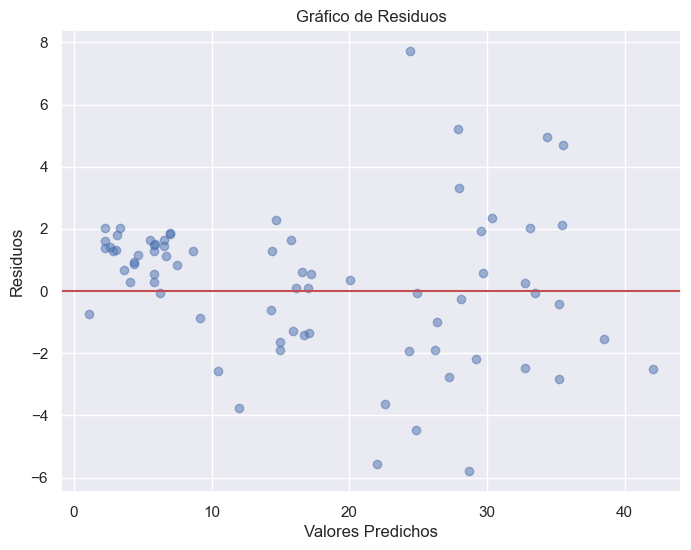

In [272]:
print_plots(sr, X_test_sd, y_test)

In [273]:
results_df = save_results(sr.score(X_test_sd, y_test),None,'Stacking Regressor',results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Stacking Regressor,0.959,NaN
Random Forest,0.959,0.921
BRF SVM,0.935,0.890
Poly SVR,0.902,0.799
Gradient Boosting,0.880,0.896


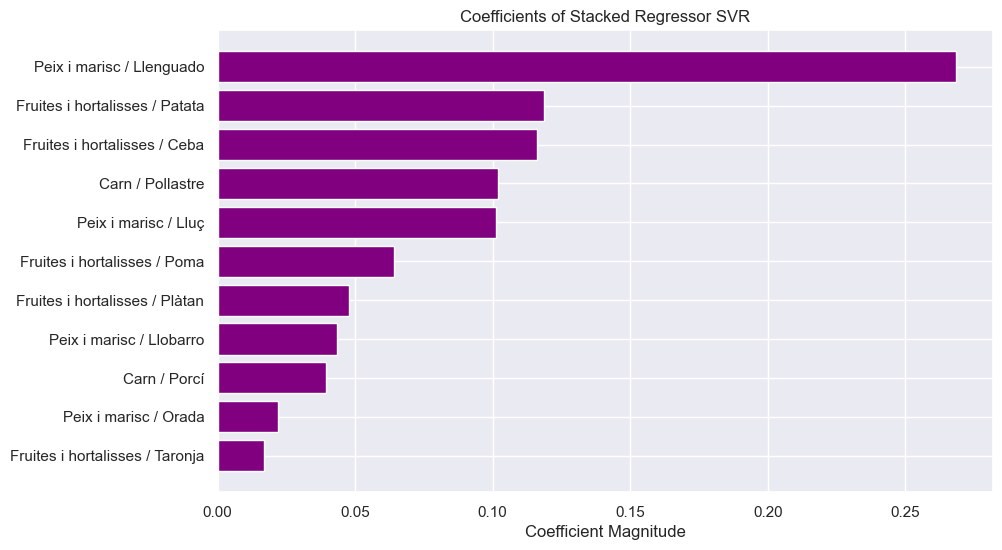

In [274]:
print_importance(sr, X_test_sd, y_test, 'Stacked Regressor SVR')

Curiosamente este no mejora mucho sobre lo que ya hay y como podemos observar sus importancias y valores residuales se asemejan mucho a las de random forest. Esto nos indica a demás de su similitud en resultados de test core que el que más a porta es ese.

In [276]:
#Ponemos los que mejores estimadores de los mejores modelos nos han dado en ambos casos
vr = VotingRegressor([('rf', rf_bs.best_estimator_),('rbfsvr', rbfsvr_bs.best_estimator_)], n_jobs=-1)
                             
vr.fit(X_train_sd, y_train);  

Error cuadrático medio (MSE): 6.248005816229797
Error absoluto medio (MAE): 1.6220821251279813
Coeficiente de determinación (R^2): 0.9526573627019178


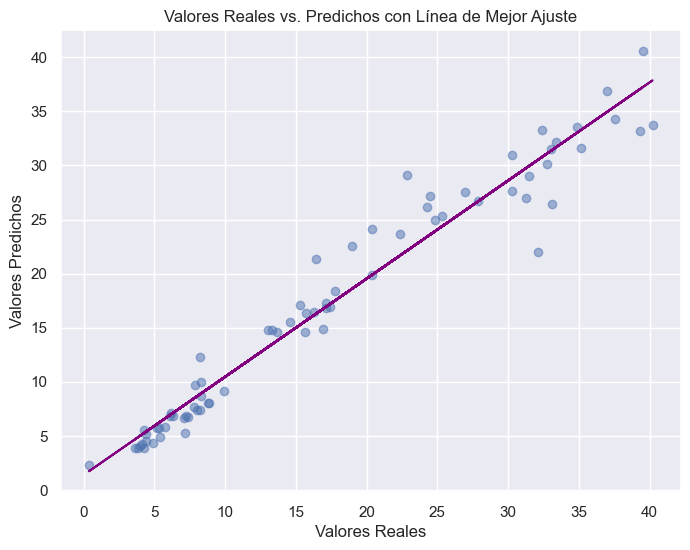

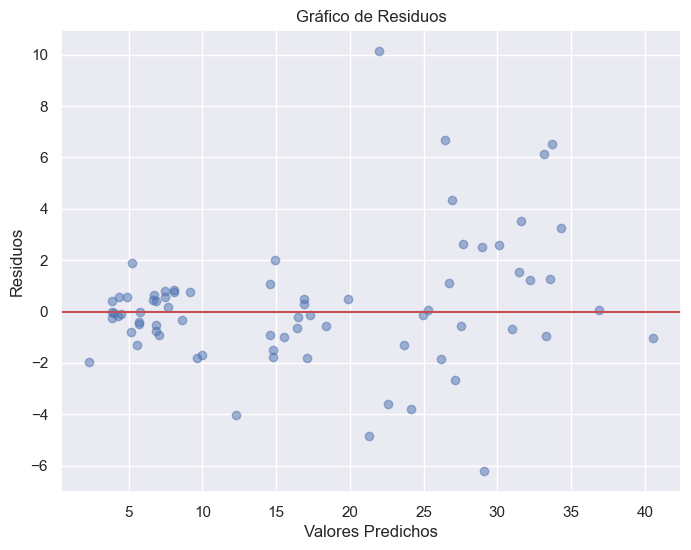

In [278]:
print_plots(vr, X_test_sd, y_test)

In [279]:
results_df = save_results(vr.score(X_test_sd, y_test),None,'Voting Regressor',results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Stacking Regressor,0.959,NaN
Random Forest,0.959,0.921
Voting Regressor,0.953,NaN
BRF SVM,0.935,0.890
Poly SVR,0.902,0.799
Gradient Boosting,0.880,0.896


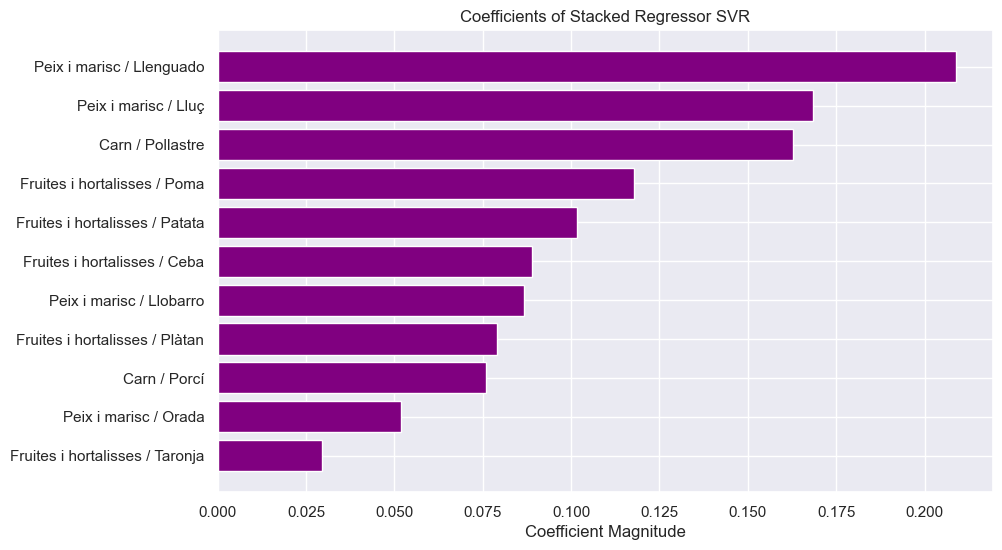

In [280]:
print_importance(vr, X_test_sd, y_test, 'Stacked Regressor SVR')

En este caso tenemos un esfuerzo mixto dónde tanto el pollo cómo el lenguado aportan su información al igual que el resto de componentes que ahora es una mezcla entre lo que ofrecía BRF SVM y RF. Esto pero no se traduce en ninguna mejora e inlcuso empeora un poco la capacidad de adivinar el conjunto de test.